# Tidy Cloze Analysis & Sentence Selection

# Table of Contents
 <p><div class="lev1"><a href="#Tidy-Cloze-Analysis-&amp;-Sentence-Selection"><span class="toc-item-num">1 - </span>Tidy Cloze Analysis &amp; Sentence Selection</a></div><div class="lev2"><a href="#Initialise/Package-Loadings"><span class="toc-item-num">1.1 - </span>Initialise/Package Loadings</a></div><div class="lev2"><a href="#Above-70%-Selection"><span class="toc-item-num">1.2 - </span>Above 70% Selection</a></div><div class="lev2"><a href="#Variable-Distribution-Analyses"><span class="toc-item-num">1.3 - </span>Variable Distribution Analyses</a></div><div class="lev3"><a href="#Housekeeping:-RT-3SDs-cutoff"><span class="toc-item-num">1.3.1 - </span>Housekeeping: RT 3SDs cutoff</a></div><div class="lev3"><a href="#Distribution-analyses"><span class="toc-item-num">1.3.2 - </span>Distribution analyses</a></div><div class="lev3"><a href="#Pull-out-all-&quot;above70"><span class="toc-item-num">1.3.3 - </span>Pull out all "above70</a></div><div class="lev2"><a href="#Assign-to-Speaker-&amp;-Condition"><span class="toc-item-num">1.4 - </span>Assign to Speaker &amp; Condition</a></div>

## Initialise/Package Loadings

In [1]:
#Libraries
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(pastecs))
suppressMessages(library(Rmisc))
suppressMessages(library(lme4))
suppressMessages(library(nlme))

#Plot Size Options
options(repr.plot.width = 7)
options(repr.plot.height = 7)

#Datasets
dat=read.csv('./tidyOutput/allSentsAllVars.csv',header=T)

In [67]:
head(dat,2)

,sentID,SentenceContext,sentenceClosure,compLower,popularity,nComp,percent,above70,comp.det,comp.noun,Lg10WF,natNess,RT,Diff
1,1,Voor veel Nederlanders is een koekje bij,heilig.,de koffie,28,52,53.84615,0,de,koffie,3.7657,4.692308,6.075269,5.673077
2,2,Jasper wilde gelijk piloot worden na het lezen van,over vliegtuigen.,een boek,20,51,39.21569,0,een,boek,3.8196,4.470588,7.154824,5.45098


## Above 70% Selection

As shown below:
Number of usable sentences: **126**.

**NOTE:** For fMRI experiment this is great and we only need to take the *top* **~20** sentences.

**TODO:** Ask Marieke to work on adapting the top sentences for the fMRI experiment. Sentences should *now* end on the critical word.

In [6]:
above70=subset(dat,above70==1)
stat.desc(above70$percent)
stat.desc(above70$above70)

nbr.val     nbr.null       nbr.na          min          max        range 
1.260000e+02 0.000000e+00 0.000000e+00 7.000000e+01 1.000000e+02 3.000000e+01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
1.091419e+04 8.750000e+01 8.662058e+01 8.079026e-01 1.598940e+00 8.224103e+01 
     std.dev     coef.var 
9.068684e+00 1.046943e-01

nbr.val     nbr.null       nbr.na          min          max        range 
         126            0            0            1            1            0 
         sum       median         mean      SE.mean CI.mean.0.95          var 
         126            1            1            0            0            0 
     std.dev     coef.var 
           0            0

## Variable Distribution Analyses

### Housekeeping: RT 3SDs cutoff

In [7]:
rtSDtrim=subset(above70, abs(RT-mean(RT))<2*sd(RT))
rtSDtrim=subset(rtSDtrim, RT<=16)

summary(rtSDtrim$RT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.024   4.787   6.222   7.153   8.739  15.490 

### Distribution analyses

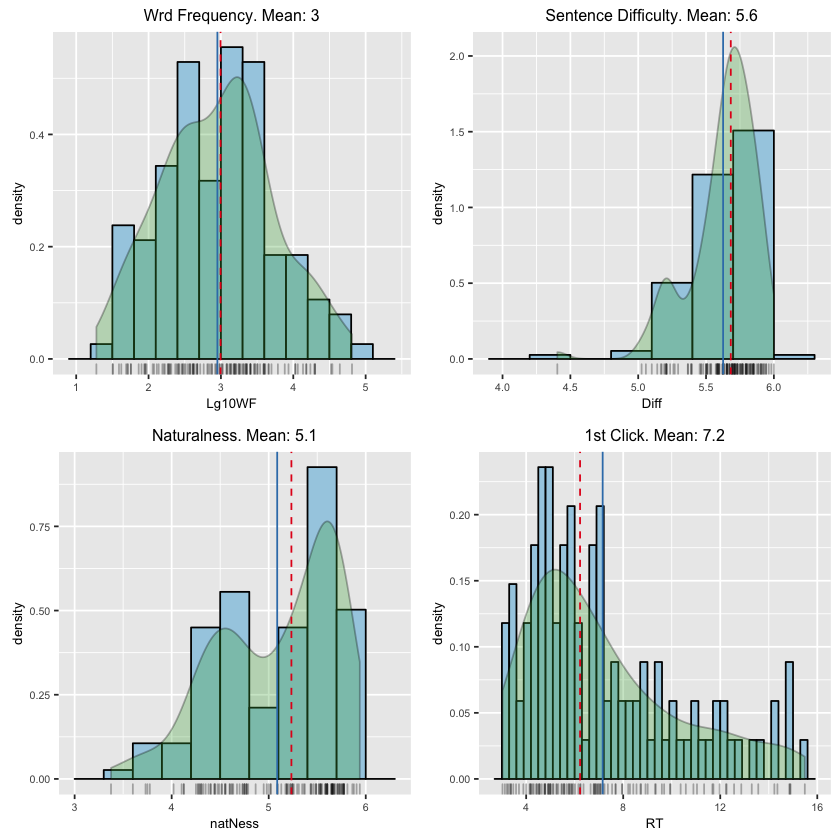

In [8]:
histFreq=ggplot(above70, aes(x=Lg10WF)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3") +
    geom_density(alpha=.3, fill="#4daf4a")+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(Lg10WF, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(Lg10WF, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("Wrd Frequency. Mean:",round(mean(above70$Lg10WF,na.rm=T),1)))+
    theme(text=element_text(size=8))

histNatNess=ggplot(above70, aes(x=natNess)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3",size=.5) +
    geom_density(alpha=.3, fill="#4daf4a",size=.5)+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(natNess, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(natNess, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("Naturalness. Mean:",round(mean(above70$natNess,na.rm=T),1)))+
    theme(text=element_text(size=8))

histDiff=ggplot(above70, aes(x=Diff)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3",size=.5) +
    geom_density(alpha=.3, fill="#4daf4a",size=.5)+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(Diff, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(Diff, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("Sentence Difficulty. Mean:",round(mean(above70$Diff,na.rm=T),1)))+
    theme(text=element_text(size=8))

histRT=ggplot(rtSDtrim, aes(x=RT)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3",size=.5) +
    geom_density(alpha=.3, fill="#4daf4a",size=.5)+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(RT, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(RT, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("1st Click. Mean:",round(mean(rtSDtrim$RT,na.rm=T),1)))+
    theme(text=element_text(size=8))

multiplot(histFreq,histNatNess,histDiff,histRT, cols=2)

### Pull out all "above70

In [76]:
#write.csv(above70,'./tidyOutput/allAbove70Sentences.csv',row.names=F)

## Assign to Speaker & Condition
**TODO:**
- check in the Costa publications on foreign accent
- analyse distributions for each speaker (for freqs, natness, and difficulty).
- check the condition status. I think the condidition (whether predicted or opposite determiner) should be randomly assigned on a per-participant basis.

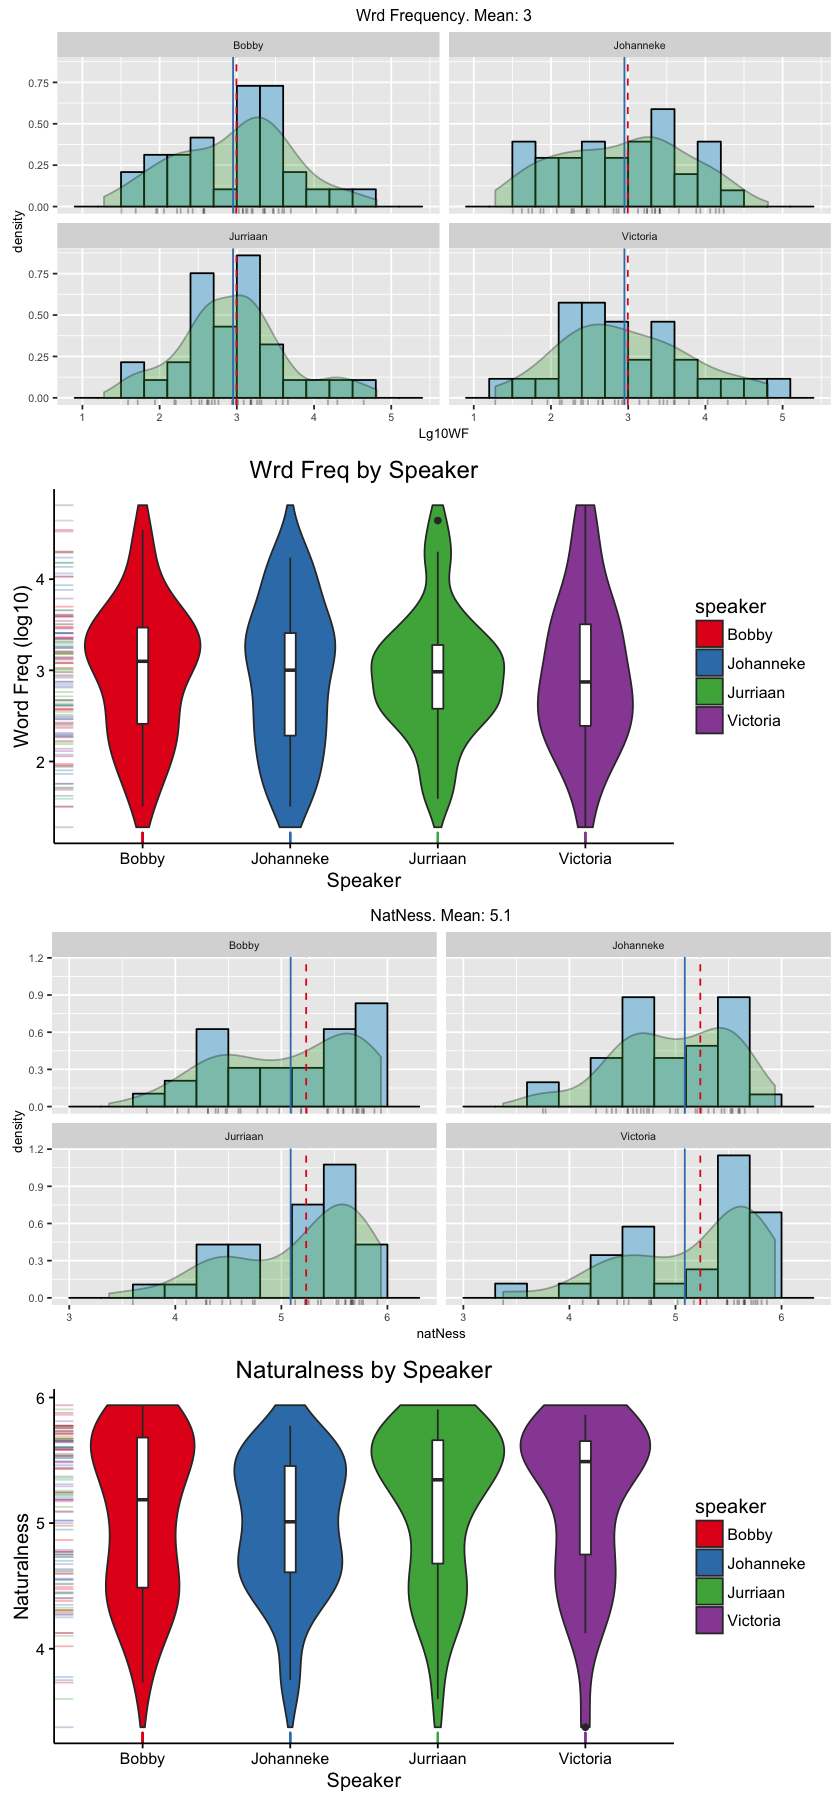

In [12]:

speakers=read.csv('./tidyOutput//allAbove70SentencesWithUnrelWithSpeaker.csv',header=T)

#Plot Size Options
options(repr.plot.width = 7)
options(repr.plot.height = 15)
histFreq=ggplot(speakers, aes(x=Lg10WF)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3") +
    geom_density(alpha=.3, fill="#4daf4a")+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(Lg10WF, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(Lg10WF, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("Wrd Frequency. Mean:",round(mean(speakers$Lg10WF,na.rm=T),1)))+
    theme(text=element_text(size=8))+facet_wrap(~speaker)

violinsFreq=ggplot(speakers, aes(x=speaker, y=Lg10WF,fill=speaker)) + 
    geom_violin(trim=FALSE)+
    scale_fill_brewer(palette="Set1") + 
    scale_colour_brewer(palette="Set1")+
    labs(title="Wrd Freq by Speaker",x="Speaker", y = "Word Freq (log10)")+
    geom_boxplot(width=0.1,fill='white')+
    geom_rug(aes(colour=speaker),alpha=.3)+
    theme_classic()

histnatNess=ggplot(speakers, aes(x=natNess)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="#a6cee3") +
    geom_density(alpha=.3, fill="#4daf4a")+
    geom_rug(alpha=.3)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(natNess, na.rm=T)),color="#377eb8", linetype="solid", size=.5)+
    geom_vline(aes(xintercept=median(natNess, na.rm=T)),color="#e41a1c", linetype="dashed", size=.5)+
    ggtitle(paste("NatNess. Mean:",round(mean(speakers$natNess,na.rm=T),1)))+
    theme(text=element_text(size=8))+facet_wrap(~speaker)

violinsnatNess=ggplot(speakers, aes(x=speaker, y=natNess,fill=speaker)) + 
    geom_violin(trim=FALSE)+
    scale_fill_brewer(palette="Set1") + 
    scale_colour_brewer(palette="Set1")+
    labs(title="Naturalness by Speaker",x="Speaker", y = "Naturalness")+
    geom_boxplot(width=0.1,fill='white')+
    geom_rug(aes(colour=speaker),alpha=.3)+
    theme_classic()

multiplot(histFreq,violins,histnatNess,violinsnatNess)


In [13]:
freqBySpeakerLM=lm(Lg10WF~speaker,data=speakers)
summary(freqBySpeakerLM)

popBySpeakerLM=lm(percent~speaker,data=speakers)
summary(popBySpeakerLM)

natNessBySpeakerLM=lm(natNess~speaker,data=speakers)
summary(natNessBySpeakerLM)


Call:
lm(formula = Lg10WF ~ speaker, data = speakers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6889 -0.5522  0.0407  0.4930  1.8438 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.97882    0.13665  21.799   <2e-16 ***
speakerJohanneke -0.06721    0.19039  -0.353    0.725    
speakerJurriaan  -0.02805    0.19480  -0.144    0.886    
speakerVictoria  -0.01116    0.19819  -0.056    0.955    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.773 on 122 degrees of freedom
Multiple R-squared:  0.001172,	Adjusted R-squared:  -0.02339 
F-statistic: 0.04773 on 3 and 122 DF,  p-value: 0.9861



Call:
lm(formula = percent ~ speaker, data = speakers)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.488  -7.878   1.538   7.361  14.819 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       87.0760     1.6161  53.879   <2e-16 ***
speakerJohanneke   0.2326     2.2517   0.103    0.918    
speakerJurriaan   -0.3332     2.3039  -0.145    0.885    
speakerVictoria   -1.8952     2.3439  -0.809    0.420    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.142 on 122 degrees of freedom
Multiple R-squared:  0.008104,	Adjusted R-squared:  -0.01629 
F-statistic: 0.3322 on 3 and 122 DF,  p-value: 0.802



Call:
lm(formula = natNess ~ speaker, data = speakers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7900 -0.4495  0.1224  0.5100  0.8667 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.07208    0.10756  47.157   <2e-16 ***
speakerJohanneke -0.10086    0.14986  -0.673    0.502    
speakerJurriaan   0.08662    0.15333   0.565    0.573    
speakerVictoria   0.09290    0.15599   0.596    0.553    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6084 on 122 degrees of freedom
Multiple R-squared:  0.01738,	Adjusted R-squared:  -0.006788 
F-statistic: 0.7191 on 3 and 122 DF,  p-value: 0.5424
